# CAR PRICE PREDICTION

In [1]:
#import the necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import the data

In [4]:
data=pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [5]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [6]:
data.head().transpose()

,0,1,2,3,4
Make,Honda,BMW,Honda,Toyota,Nissan
Colour,White,Blue,White,White,Blue
Odometer (KM),35431.0,192714.0,84714.0,154365.0,181577.0
Doors,4.0,5.0,4.0,4.0,3.0
Price,15323.0,19943.0,28343.0,13434.0,14043.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [8]:
data.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [9]:
#Now printing the Car price 

In [10]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [11]:
data.shape

(1000, 5)

In [12]:
#filling the missing values
data["Make"].fillna("missing",inplace=True)
data.isna().sum()

Make              0
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
data["Colour"].fillna("missing",inplace=True)
data.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [14]:
data["Odometer (KM)"].fillna("missing",inplace=True)
data.isna().sum()


Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [15]:
data["Doors"].fillna("missing",inplace=True)
data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [16]:
data["Price"].fillna("missing",inplace=True)
data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [17]:
#dividing the data into the x and y
x=data.drop("Price",axis=1)
y=data["Price"]


In [18]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [19]:
y.tail()

995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, dtype: object

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
#set up
np.random.seed(42)
#import data and drop rows with missing data
sales=pd.read_csv("car-sales-extended-missing-data.csv")
sales.dropna(subset=["Price"],inplace=True)
#define featues and transformer
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))])
door_features=["Doors"]
door_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant",fill_value=4))
])
numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])
#setup preprocessing
preprocessor=ColumnTransformer(transformers=[
    ("cat",categorical_transformer,categorical_features),
    ("door",door_transformer,door_features),
    ("num",numeric_transformer,numeric_features)
])
#modelling pipelines
model=Pipeline(steps=[("preprocessor",preprocessor),
                     ("model",RandomForestRegressor())])
#split data
x=sales.drop("Price",axis=1)
y=sales["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#fit and score
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

                        
                                
                            
                               


In [21]:
#Evolution
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, mean_squared_log_error

In [25]:
mae=mean_absolute_error(y_test,y_pred)
mae

5713.166838091587

In [26]:
r2=r2_score(y_test,y_pred)

In [24]:
r2

0.22188417408787875

In [27]:
msle=mean_squared_log_error(y_test,y_pred)

In [28]:
msle

0.2641013315383459

In [29]:
mse=mean_squared_error(y_test,y_pred)

In [30]:
mse

52102396.83378156

In [35]:
model_results={ "mean_absolute_error":mae,
              "r2_score":r2,
              "msle":msle,
              "mean_squared_error":mse}

In [36]:
model_results

{'mean_absolute_error': 5713.166838091587,
 'r2_score': 0.22188417408787875,
 'msle': 0.2641013315383459,
 'mean_squared_error': 52102396.83378156}

In [38]:
model_evo=pd.Series(model_results)

In [41]:
model_evo

mean_absolute_error    5.713167e+03
r2_score               2.218842e-01
msle                   2.641013e-01
mean_squared_error     5.210240e+07
dtype: float64

<AxesSubplot:>

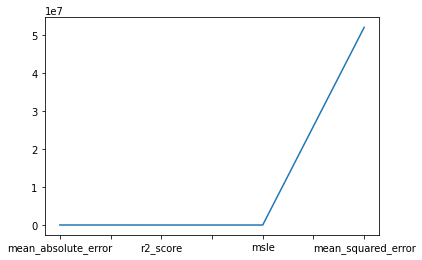

In [42]:
model_evo.plot()